In [3]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [54]:
img_size = 256
batch_size = 32
channels=3
epoches = 50

In [33]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Lenovo\ds\datasets\PlantVillage",
    shuffle=True,
    image_size = (img_size, img_size),
    batch_size = batch_size
)

Found 20638 files belonging to 15 classes.


In [34]:
dataset.class_names

['Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Target_Spot',
 'Tomato_Tomato_mosaic_virus',
 'Tomato__YellowLeaf_Curl_Virus',
 'Tomato_healthy']

In [35]:
class_names = dataset.class_names

In [36]:
for img_batch, label_batch in dataset.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 9 13 10 13  1 14 10 10  3  1  1  6 13 11 11 10 13  5  2 10  2  3  0  2
 11 13 13  1  7 13 13  7]


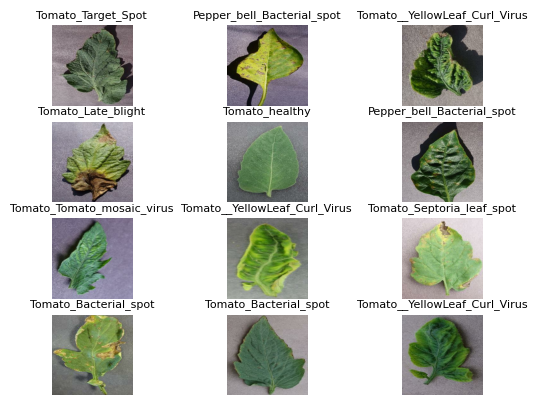

In [52]:
for img_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()], fontsize=8)
        plt.axis("off")
        

In [53]:
len(dataset)

645

In [57]:
train_size = 0.8
train_len = len(dataset)*train_size
train_len

516.0

In [59]:
train_ds = dataset.take(516)
len(train_ds)

516

In [60]:
remain_ds = dataset.skip(516)
len(remain_ds)

129

In [65]:
len(remain_ds)*0.5

64.5

In [66]:
validation_ds = remain_ds.take(64)
len(validation_ds)

64

In [67]:
test_ds = remain_ds.skip(64)
len(test_ds)

65

In [77]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(val_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [78]:
len(dataset)

645

In [79]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [80]:
len(train_ds)

516

In [81]:
len(val_ds)

64

In [82]:
len(test_ds)

64

In [83]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [88]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_size, img_size),
    layers.Rescaling(1./255),
])